In [81]:
# Random Forest Regression
# Import libraries
import numpy as np
import pandas as pd

# Upload the dataset
diamondsDataset = pd.read_csv('C:/Users/yourm/Downloads/System Simulation(Masters)/diamonds.csv')
diamondsDataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [74]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()

# Convert the variables to numerical
for i in range(3):
    new = le.fit_transform(diamondsDataset[categorical_features[i]])
    diamondsDataset[categorical_features[i]] = new
diamondsDataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [75]:
features = dataset[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
target = dataset[['price']]

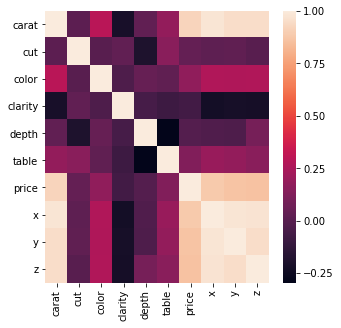

In [76]:
#correlation plot - shows how each column is realated to other columns and itself
import seaborn as sns
import matplotlib.pyplot as plt

diamondsDataset.corr()
#plt.matshow(dataset.corr())
#plt.show()

plt.figure(figsize= (5, 5))
sns.heatmap(dataset.corr())
plt.show()

In [79]:
# Make necessary imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 101)

# Train the model
regressor = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [80]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction
predictions = regressor.predict(X_test)

result = X_test
result['price'] = y_test
result['prediction'] = predictions.tolist()
result.head()

,carat,depth,table,x,y,z,clarity,cut,color,price,prediction
46519,0.51,62.7,54.0,5.10,5.08,3.19,4,2,3,1781,1716.421310
8639,1.06,61.9,59.0,6.52,6.50,4.03,2,3,5,4452,4284.511616
23029,0.33,61.3,56.0,4.51,4.46,2.75,2,2,3,631,624.810560
51641,0.31,63.1,58.0,4.30,4.35,2.73,5,1,3,544,665.667238
25789,2.04,58.8,60.0,8.42,8.32,4.92,2,3,5,14775,15423.350321


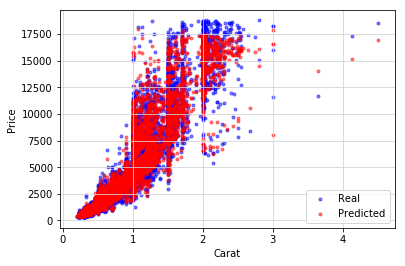

In [67]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.carat

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [68]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 315.66
Mean Squared Error: 348298.35
R-squared scores: 0.98


In [69]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
    'max_depth': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}
gridforest = GridSearchCV(regressor, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 11.3min finished


{'max_depth': 70, 'n_estimators': 1100}

In [70]:
# Get features list
characteristics = X.columns
# Get the variables importances, sort them, and print the result
importances = list(regressor.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: carat                Importance: 0.53
Variable: y                    Importance: 0.37
Variable: clarity              Importance: 0.07
Variable: color                Importance: 0.03
Variable: depth                Importance: 0.0
Variable: table                Importance: 0.0
Variable: x                    Importance: 0.0
Variable: z                    Importance: 0.0
Variable: cut                  Importance: 0.0


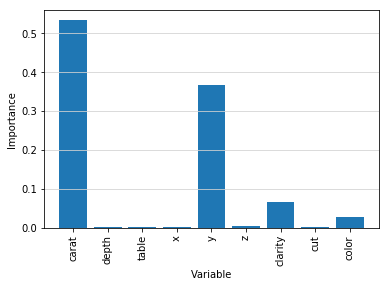

In [71]:
# Visualize the variables importances
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()